In [148]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
#dataset taken from kaggle
#reading a csv file--colors.csv

color_col = ["color", "color_name", "hex", "R", "G", "B"]
colors_data = pd.read_csv('C:/Users/admin/Desktop/ML_Projects/colors.csv', names=color_col, header=None)
colors_data

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


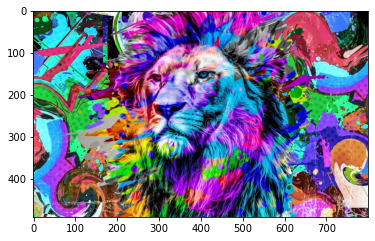

In [150]:
img = cv2.imread('C:/Users/admin/Desktop/ML_Projects/lion.jpg')
plt.imshow(img)

In [151]:
clicked = False
r = g = b = x_pos = y_pos = 0

In [152]:
def color_name(R,G,B):
    minimum = 10000
    for i in range(len(colors_data)):
        val = abs(R - int(colors_data.loc[i, "R"])) + abs(G - int(colors_data.loc[i, "G"])) + abs(B - int(colors_data.loc[i, "B"]))
        if val <= minimum:
            minimum = val
            cname = colors_data.loc[i, "color_name"]
    return cname 

In [153]:
def draw_fun(eve, x, y, flags, param):
    if eve == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [154]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_fun)

In [155]:
while True: 
    cv2.imshow("image",img)
    if clicked:
        
        cv2.rectangle(img, (20,20), (600, 60), (b, g, r), -1)
        col_text = color_name(r,g,b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
        cv2.putText(img, col_text, (50,50), 2, 0.8, (255,255,255), 2, cv2.LINE_AA)
        

        if r + g + b >= 600:
            cv2.putText(img, col_text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        clicked = False

        
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()